In [1]:
import numpy as np
import matplotlib.pyplot as plt

D = 100
N = 2
xdata = np.random.randn(D * N).reshape(D, N).astype(np.float32)

In [2]:
def f(x):
    y = x * x
    return y

In [3]:
tdata = (xdata[:,1] > f(xdata[:,0])).astype(np.int32)

In [4]:
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable, Chain, config

In [5]:
C = 2
NN = Chain(l1 = L.Linear(N, 4), l2 = L.Linear(4, C))

In [13]:
def model(x):
    h = NN.l1(x)
    h = F.sigmoid(h)
    y = NN.l2(h)
    return y

In [26]:
ydata = model(xdata)

In [27]:
acc = F.accuracy(ydata, tdata)
print(acc)

variable(0.98)


In [17]:
optNN = Opt.SGD()
optNN.setup(NN)

In [18]:
loss_series = []
acc_series = []

In [24]:
T = 20000
for time in range(T):
    config.train = True
    optNN.target.zerograds()
    ydata = model(xdata)
    loss = F.softmax_cross_entropy(ydata, tdata)
    acc = F.accuracy(ydata, tdata)
    loss.backward()
    optNN.update()
    loss_series.append(loss.data)
    acc_series.append(acc.data)

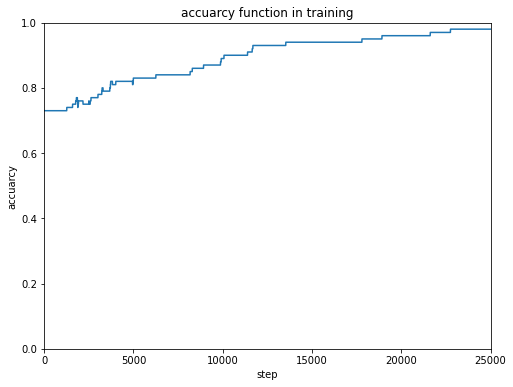

In [25]:
Tall = len(acc_series)
plt.figure(figsize = (8, 6))
plt.plot(range(Tall), acc_series)
plt.title("accuarcy function in training")
plt.xlabel("step")
plt.ylabel("accuarcy")
plt.xlim([0, Tall])
plt.ylim([0, 1])
plt.show()

In [ ]:
Tall = len(loss_series)
plt.figure(figsize = (8, 6))
plt.plot(range(Tall), loss_series)
plt.title("loss function in training")
plt.xlabel("step")
plt.ylabel("loss")
plt.xlim([0, Tall])
plt.ylim([0, 1])
plt.show()